STEP 1

Read about the a famous Wine Quality Dataset stored at UCI

[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Think about the following quesitons

What is the Target Variable and what is it meant to predict?

These datasets can be viewed as classification or regression tasks, what does that mean? 


STEP 2

Download the Red Wine dataset and store it in the file section of your Jutype Lab

STEP 3 

Describe how a business can use this dataset and a linear regression model. Try incorporating images, lists and tables.

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## Business Cases for Wine Quality Dataset

### 1. Quality
 The main use of this dataset is to determine the actualy quality of the wine by analyzing its properties to perdics if it meets the quality standards.

Different properties tracked in the wine dataset are:
| Property | Description |
|----------|-------------|
| Fixed Acidity | Most acids involved with wine or fixed or nonvolatile (do not evaporate readily). |
| Volatile Acidity | The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. |
| Citric Acid | Found in small quantities, citric acid can add 'freshness' and flavor to wines. |
| Residual Sugar | The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. |
| Chlorides | The amount of salt in the wine. |
| Free Sulfur Dioxide | The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. |
| Total Sulfur Dioxide | Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. |
| Density | The density of water is close to that of water depending on the percent alcohol and sugar content. |
| pH | Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic). Most wines are between 3 (very acidic) and 4 (very basic). |
| Sulphates | A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. |
| Alcohol | The percent alcohol content of the wine. |
| Quality | Output variable (based on sensory data, score between 0 and 10). |

(Descriptions are copied from online sources)




### 2. Pricing
 The dataset can also be used to determine the price of the wine by analyzing its properties to predict the price of the wine.
 With this information they can also determine where the wine will sit on the shelves in stores to maximize sales.
 ![Image of wine shelf at sotre](https://images.food52.com/4E5pt4d9moYMpovDOrS5rNKQQbQ=/6772c70e-a342-4909-85c0-b2bb53c90848--OD-AW548_WINE_G_20130410114251.jpg)



STEP 3 - Load and Explore the Data

* 3.1 Load the Wine dataset into a Pandas DataFrame (HINT: the file is not comma delimited but it is delimited by a ; you can change the delimiter or have pandas accept it)
* 3.2 Show the Head and Tail of the Dataframe
* 3.3 Provide information about the dataset
* 3.4 Create a correlation Matrix and an accompanying Heat Map
* 3.5 Using the heat map find three strong corelations and plot them using a scatter plot 
* (BONUS 1: Use Matplotlib and Seaborn) 
* (BONUS 2: Include a best fit line)


In [282]:
# 3.0 Imorts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression



In [283]:
# 3.1 Load the Wine dataset into a Pandas DataFrame (HINT: the file is not comma delimited but it is delimited by a ; you can change the delimiter or have pandas accept it)
wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [284]:
# 3.2.1 Show the Head of the Dataframe
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [285]:
# 3.2.1 Show the Tail of the Dataframe
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [286]:
# 3.3 Provide information about the dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


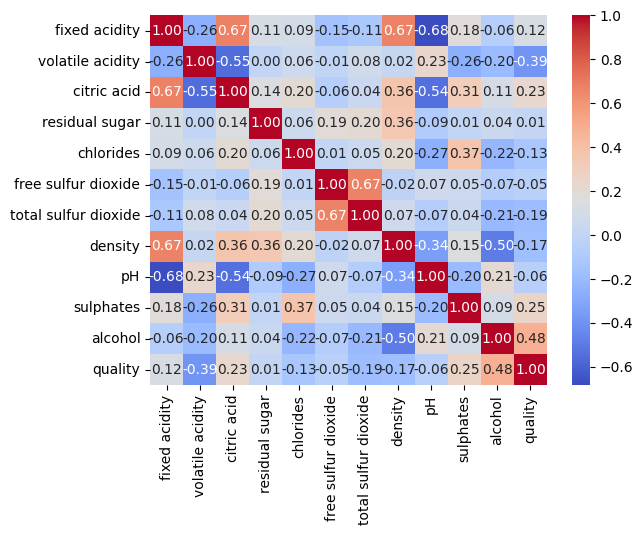

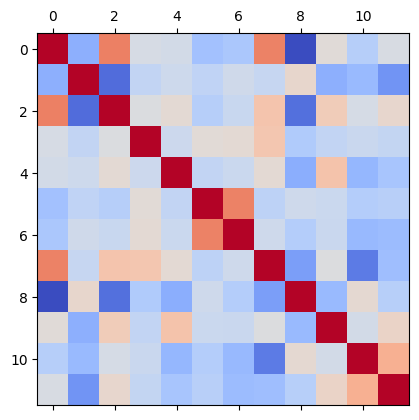

In [287]:
# 3.4 Create a correlation Matrix and an accompanying Heatmap
corr = wine_df.corr()

# using seaborn
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, fmt='.2f', annot=True, cmap='coolwarm')

# using matplotlib
plt.matshow(corr, cmap='coolwarm')


<AxesSubplot: xlabel='fixed acidity', ylabel='pH'>

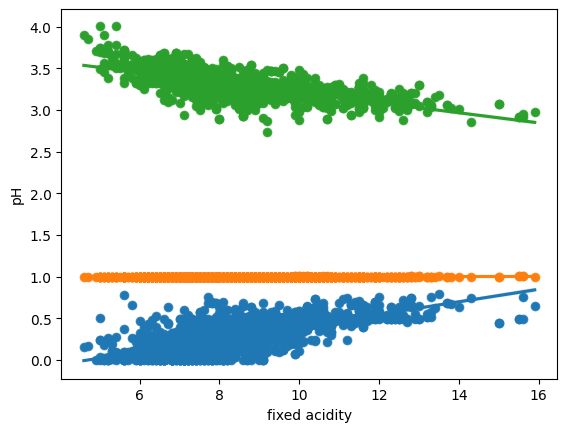

In [288]:
# 3.5 Using the heat map find three strong corelations and plot them using a scatter plot 
sns.scatterplot(x='fixed acidity', y='citric acid', data=wine_df)
sns.scatterplot(x='fixed acidity', y='density', data=wine_df)
sns.scatterplot(x='fixed acidity', y='pH', data=wine_df)

# best fit line
sns.regplot(x='fixed acidity', y='citric acid', data=wine_df)
sns.regplot(x='fixed acidity', y='density', data=wine_df)
sns.regplot(x='fixed acidity', y='pH', data=wine_df)



STEP 4 - Build and train the Linear Regression Model

* 4.1 Split the data by putting the target column in an array and dropping the target column in the DataFrame
* 4.2 Split the data into Testing and Training
* 4.3 Setup the Sklearn Linear Regression 
* 4.4 Train the model using the training dataset
* 4.5 Test the modle using the testing dataset
* 4.6 Comment on the acuracy of the model
* 4.7 Create a confusion matrix
* 4.8 Make a prediciton

In [289]:
# 4.1 Split the data by putting the target column in an array and dropping the target column in the DataFrame

#sort the correlations
corr['quality'].sort_values()

# split data with target column in an array
y = wine_df['quality']
x = wine_df[list(wine_df.columns)[:-1]]


In [290]:
# 4.2 Split the data into Testing and Training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)


In [291]:
# 4.3 Setup the Sklearn Linear Regression 
# See Imports ^
lr = LinearRegression()

In [292]:
# 4.4 Train the model using the training dataset
lr.fit(X_train, y_train)

LinearRegression()

In [293]:
# 4.5 Test the modle using the testing dataset
y_pred = lr.predict(X_test)

Mean squared error: 0.42
Test Accuracy: 0.33100015428800134


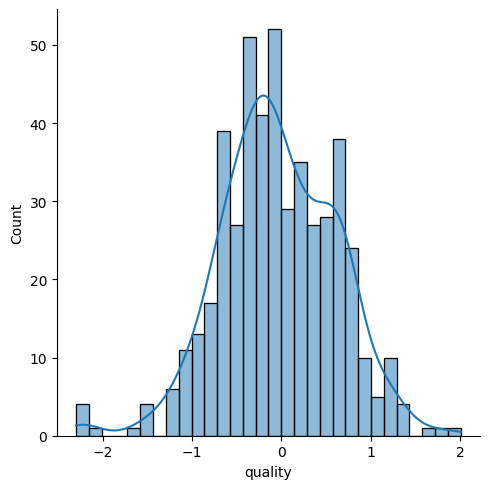

In [294]:
# 4.6 Comment on the acuracy of the model
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))

print("Test Accuracy: {}".format(lr.score(X_test, y_test)))

sns.displot((y_test-y_pred),bins=30, kde=True)



The accuracy is not great. You can see we get a mean squared error of 0.42 and an accuracy of 0.33. This means that the model is not very good at predicting the quality of the wine. This is not surprising as there are many factors that go into the quality of wine and we are only using a few of them.

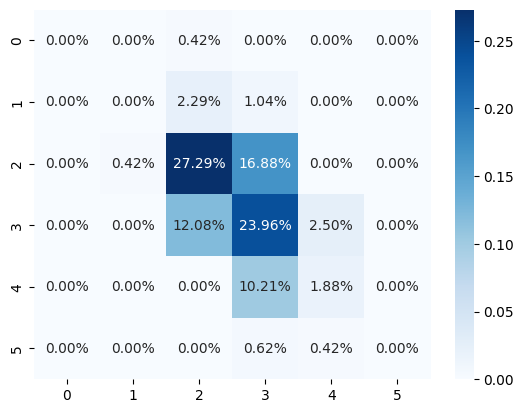

In [295]:
# 4.7 Create a confusion matrix
cf = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [296]:
# 4.8 Make a prediciton
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
test_perdiction_array = np.array([7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4])
test_perdiction_df = pd.DataFrame(test_perdiction_array.reshape(1, -1), columns=column_names)
test_perdiction_df

lr.predict(test_perdiction_df)


array([5.0803106])